In [52]:
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

import pandas as pd
import matplotlib.pyplot as plt
import os


In [53]:
# input dataset
input_data = 'cps_00006self copy.csv'
# location of two output files
mode = 'correlated_attribute_mode'
description_file = 'descriptionCPSTOBACCOUSE202209_2024-06-16T165403.json'
synthetic_data = 'synthetic_cps_00006self copye2d0.csv'

In [54]:

# An attribute is categorical if its domain size is less than this threshold.
threshold_value = 20

# specify categorical 非数字 attributes
categorical_attributes = {
    'SEX': True,'RACE': True,'HISPAN': True,'EDUC': True,'TCIG100': True, 'TFREQ': True,
    'TSMKER': True,'THABIT1': True,'TPLAN6':True,'TRYSTOP':True,'TRYQUIT':True,'TEVERSTOP':True,'ECEV':True,
    'ECFREQ':True #,'':True,'':True,'':True,'':True,'':True,'':True,
} #{'RT13V3': True, 'RT13V4',RT13V11, RT13V12 RT13V13, RT13V14, RT13V15, RT13V18, RT13V21, RT13V24, RT13V27, RT13V28, RT13V29, RT13V30, RT13V31, RT13V32 RT13V33}

# specify which attributes are candidate keys of input dataset.
candidate_keys = {}#'YEAR','MONTH','PERNUM','WTFINL','CPSIDV','CPSIDP'}

# A parameter in Differential Privacy. It roughly means that removing a row in the input dataset will not 
# change the probability of getting the same output more than a multiplicative difference of exp(epsilon).
# Increase epsilon value to reduce the injected noises. Set epsilon=0 to turn off differential privacy.
epsilon = 2

# The maximum number of parents in Bayesian network, i.e., the maximum number of incoming edges.
degree_of_bayesian_network = 2

# Number of tuples generated in synthetic dataset.
num_tuples_to_generate = 161725

null_values = []

In [55]:
#Runs one iteration of creating the Bayesian network, generating the data and comparing it to the original data
def runDataSynth(degree, epsilon, gennum, beta, theta, threshold_value, null_values, description_file, synthetic_data, seed):
    print("Data generated for epsilon " + str(epsilon) + " and degree " + str(degree))
    #Generates the Bayesian Network
    describer = DataDescriber(category_threshold=threshold_value,  null_values=null_values)
    describer.describe_dataset_in_correlated_attribute_mode(dataset_file=input_data, 
                                                        epsilon=epsilon, 
                                                        beta = beta,
                                                        theta = theta,
                                                        k=degree,
                                                        attribute_to_is_categorical=categorical_attributes,
                                                        attribute_to_is_candidate_key=candidate_keys,
                                                        seed = seed)
    describer.save_dataset_description_to_file(description_file)

    #Displays the bayesian network
    print("Bayesian for epsilon " + str(epsilon) + " and degree " + str(degree))
    display_bayesian_network(describer.bayesian_network)
    #generates the synthetic data and saves it to synthetic data
    generator = DataGenerator()
    generator.generate_dataset_in_correlated_attribute_mode(gennum, description_file)
    generator.save_synthetic_data(synthetic_data)

    # Read both datasets using Pandas.
    input_df = pd.read_csv(input_data, skipinitialspace=True)
    synthetic_df = pd.read_csv(synthetic_data)
    # Read attribute description from the dataset description file.
    attribute_description = read_json_file(description_file)['attribute_description']
    inspector = ModelInspector(input_df, synthetic_df, attribute_description)
    

    print("Comparison for epsilon " + str(epsilon) + " and degree " + str(degree))
    
    path = 'datasynthplt/' + "epsilon" + str(epsilon) + "degree" + str(degree)
    isExist = os.path.exists(path)
    if not isExist:
        os.makedirs(path)
    for attribute in synthetic_df.columns:
        photo = path + "/" + str(attribute) +'.png'
        inspector.compare_histograms(attribute)
        plt.savefig(photo, dpi=300, bbox_inches='tight')
        #plt.cla()
        #plt.close()

    inspector.mutual_information_heatmap()
    photo = path + '/heatmap.png'
    plt.savefig(photo, dpi=300, bbox_inches='tight')
    #plt.cla()
    #plt.close()
    
    return synthetic_df

    

Data generated for epsilon 2 and degree 0
================ Constructing Bayesian Network (BN) ================
Adding ROOT TRYQUIT
Adding attribute TRYSTOP
Adding attribute TBSUPPWT
Adding attribute AGE
Adding attribute WTFINL
Adding attribute RACE
Adding attribute ECFREQ
Adding attribute TPLAN6
Adding attribute HISPAN
Adding attribute TCIG100
Adding attribute TEVERSTOP
Adding attribute ECEV
Adding attribute TFREQ
Adding attribute TSMKER
Adding attribute THABIT1
Adding attribute EDUC
Adding attribute SEX
Adding attribute TSINCEQUIT
========================== BN constructed ==========================
[('TRYSTOP', ['TRYQUIT']), ('TBSUPPWT', ['TRYSTOP']), ('AGE', ['TBSUPPWT']), ('WTFINL', ['TBSUPPWT']), ('RACE', ['WTFINL']), ('ECFREQ', ['TRYSTOP', 'TRYQUIT']), ('TPLAN6', ['TRYQUIT', 'TRYSTOP']), ('HISPAN', ['TBSUPPWT']), ('TCIG100', ['ECFREQ', 'TPLAN6']), ('TEVERSTOP', ['TRYSTOP', 'TCIG100']), ('ECEV', ['TRYQUIT', 'ECFREQ', 'TCIG100']), ('TFREQ', ['TCIG100', 'TPLAN6', 'ECEV']), ('TSMKER',

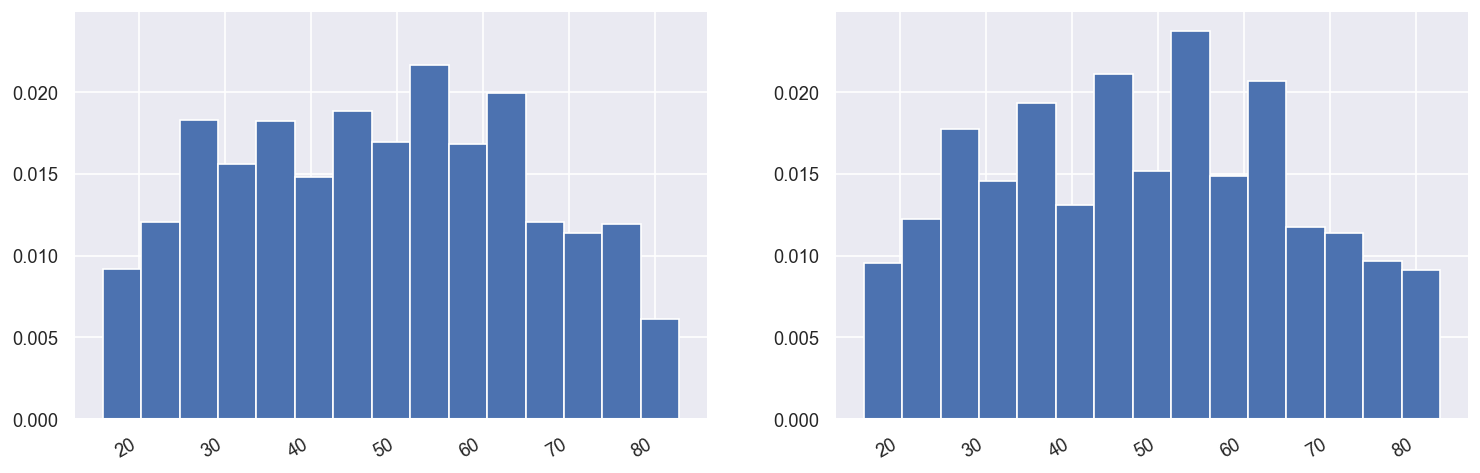

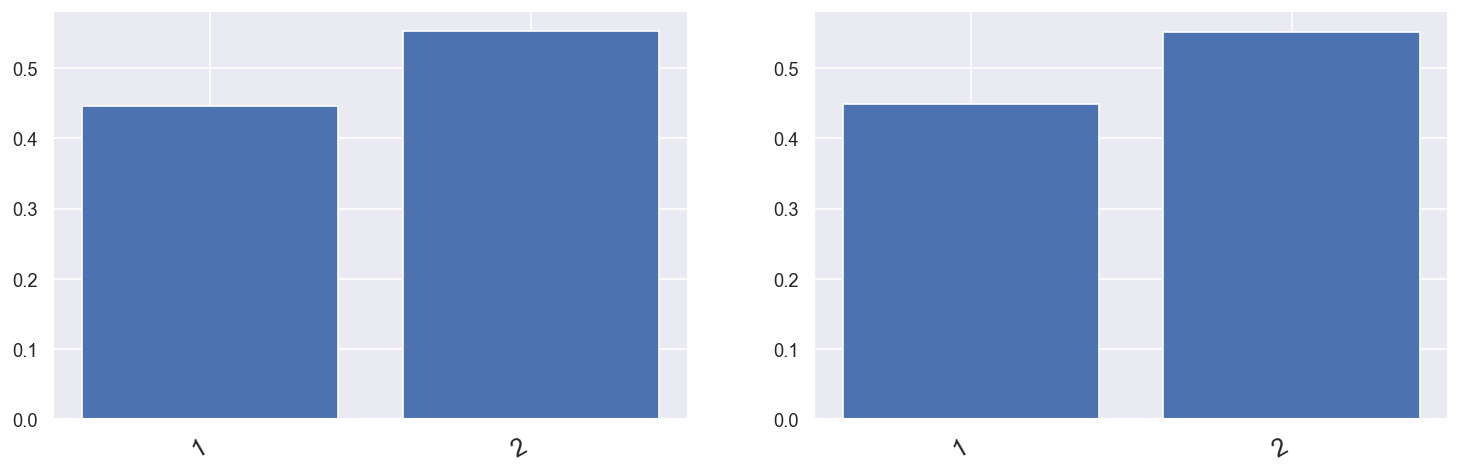

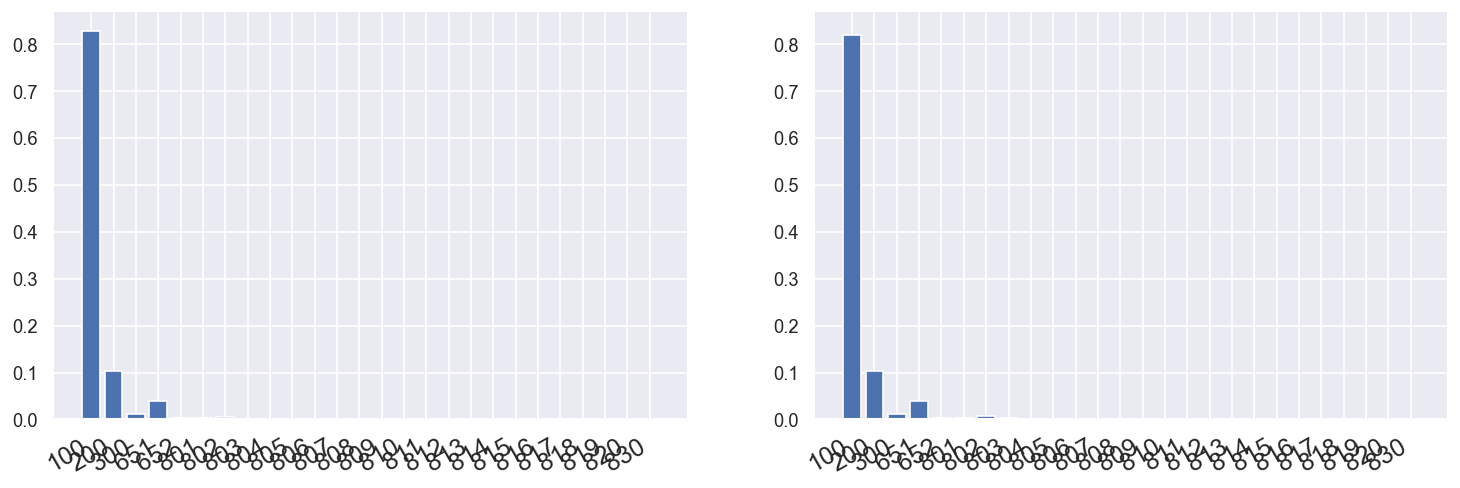

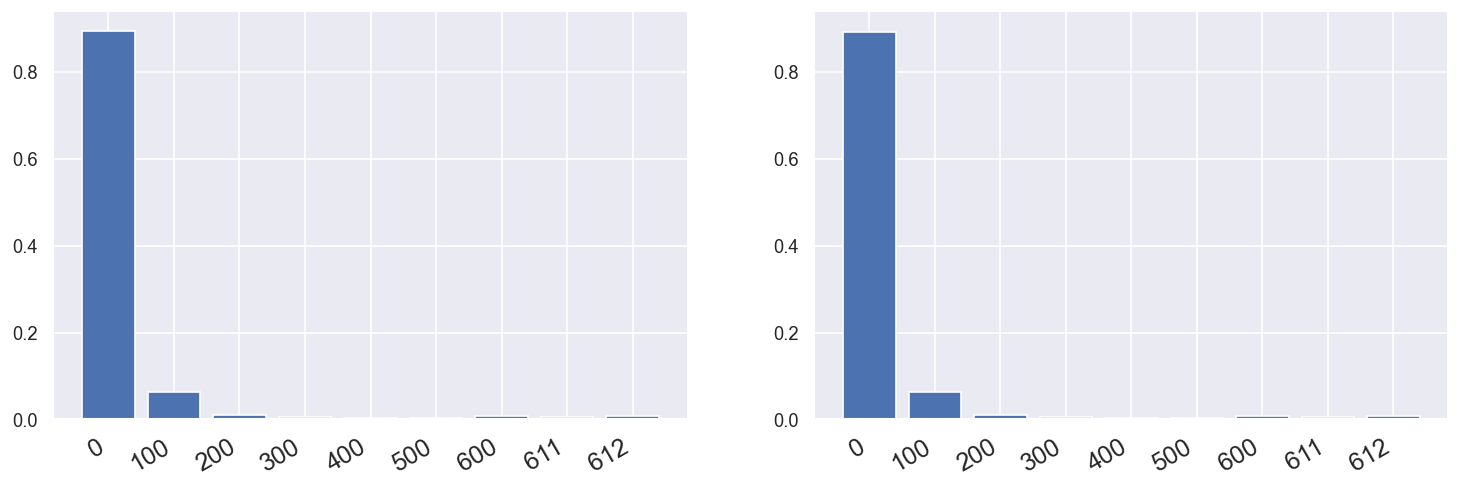

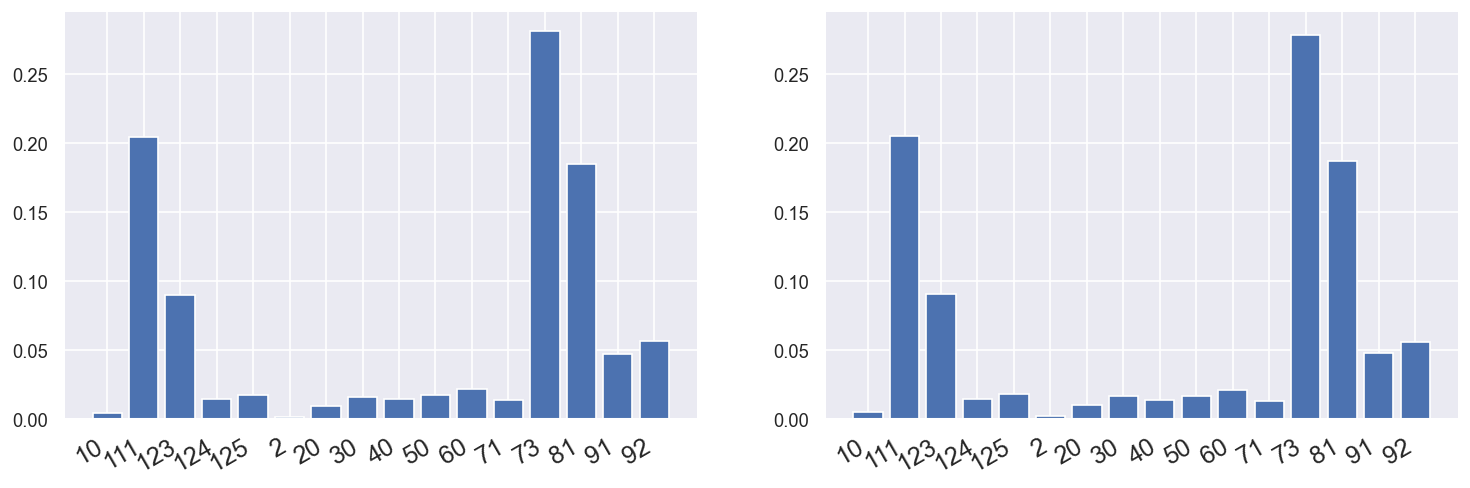

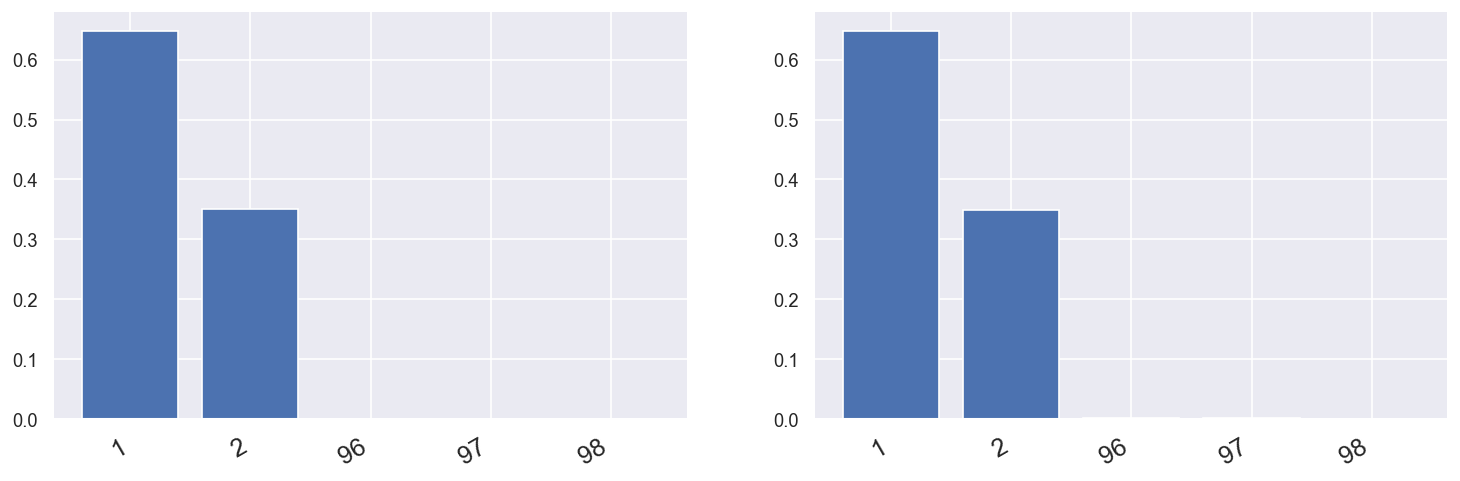

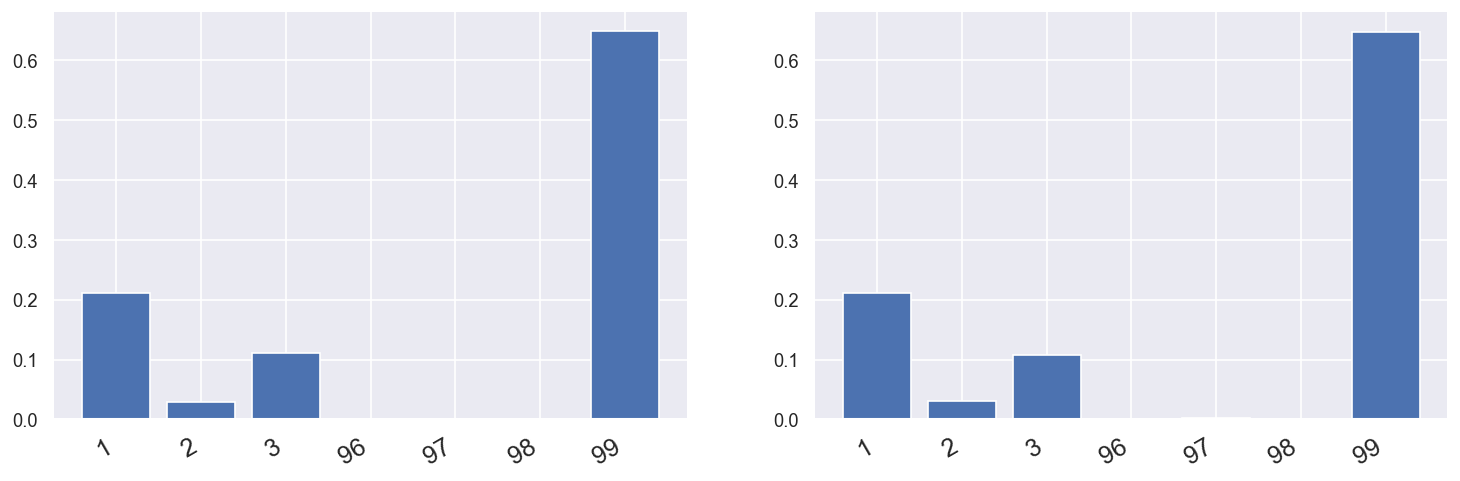

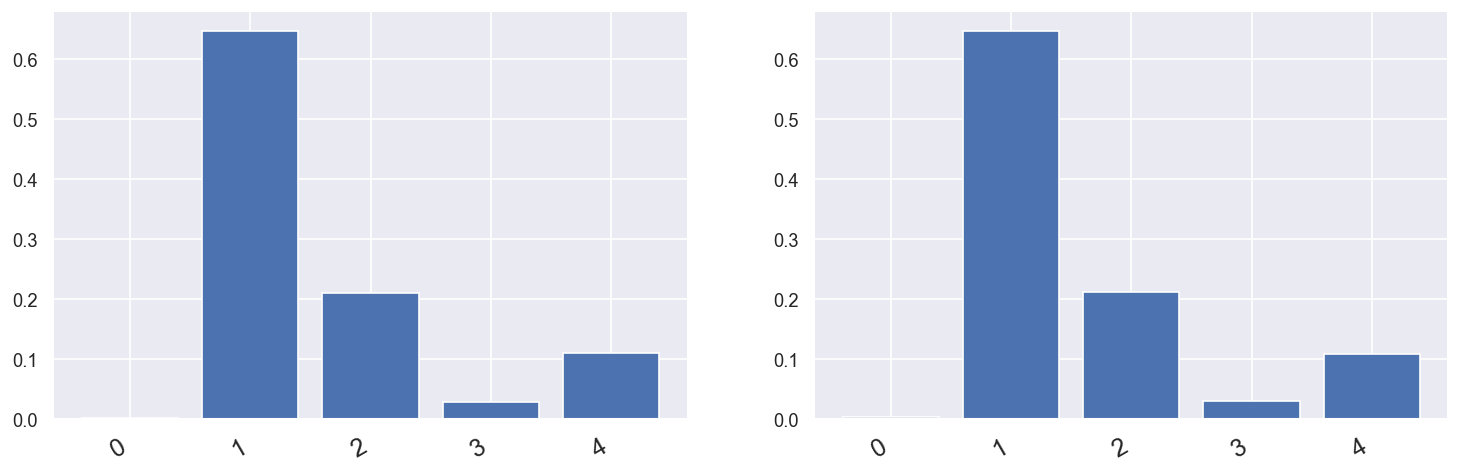

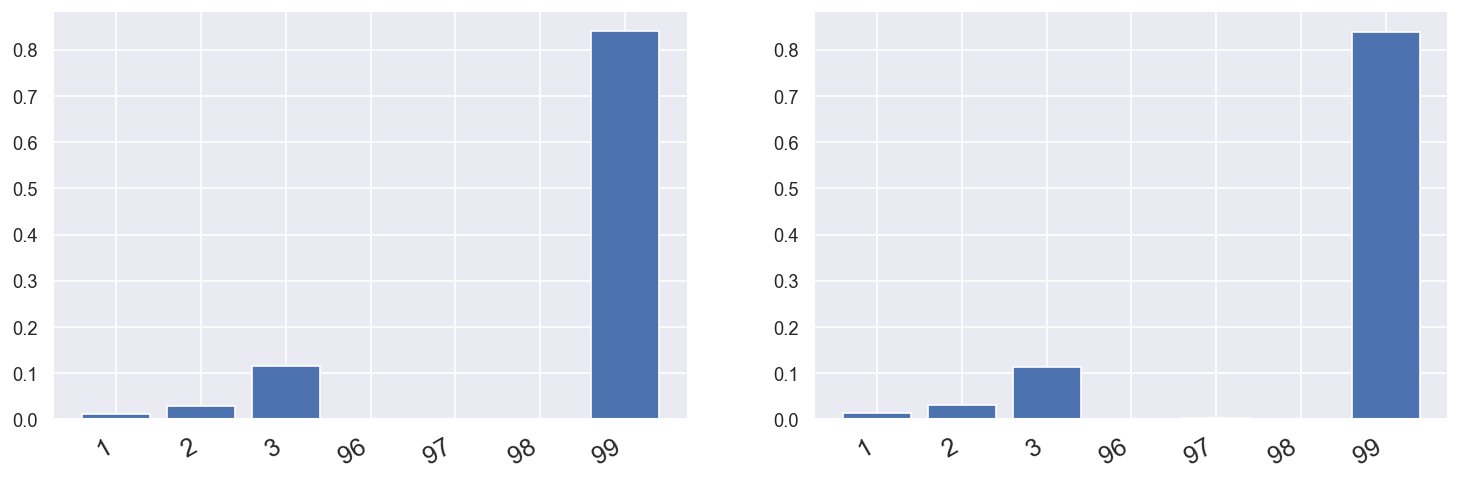

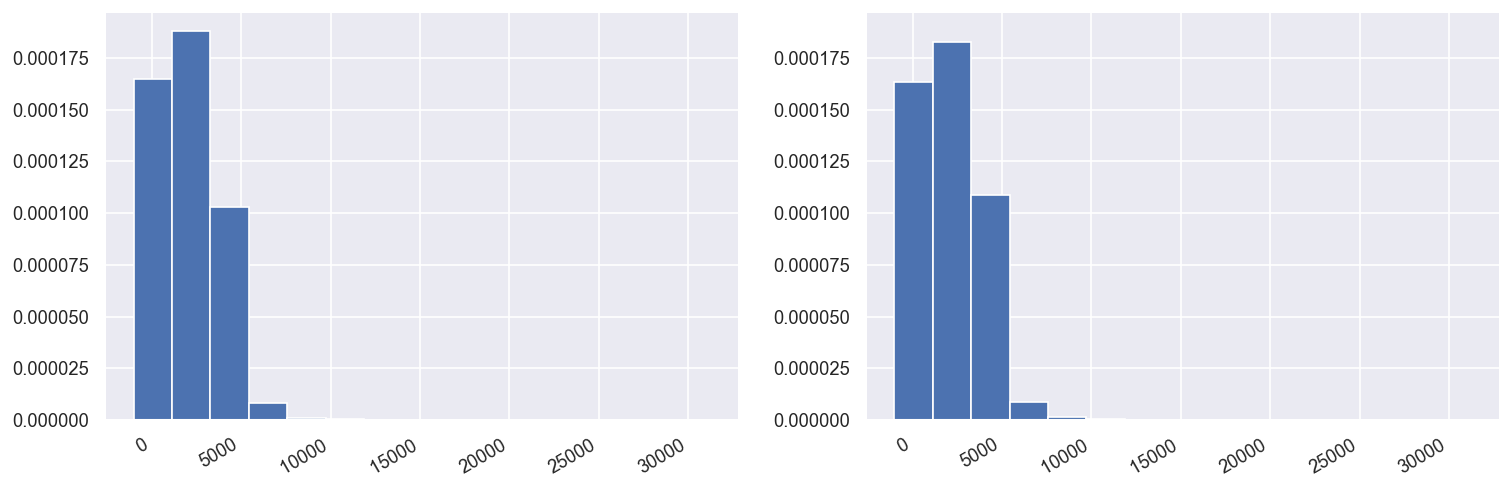

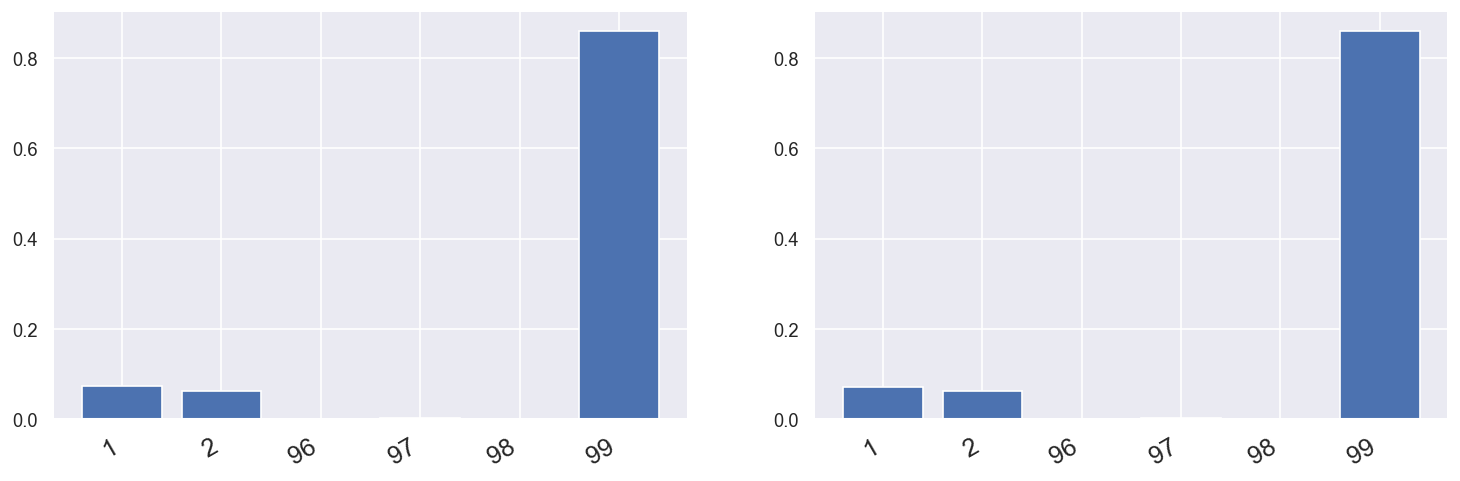

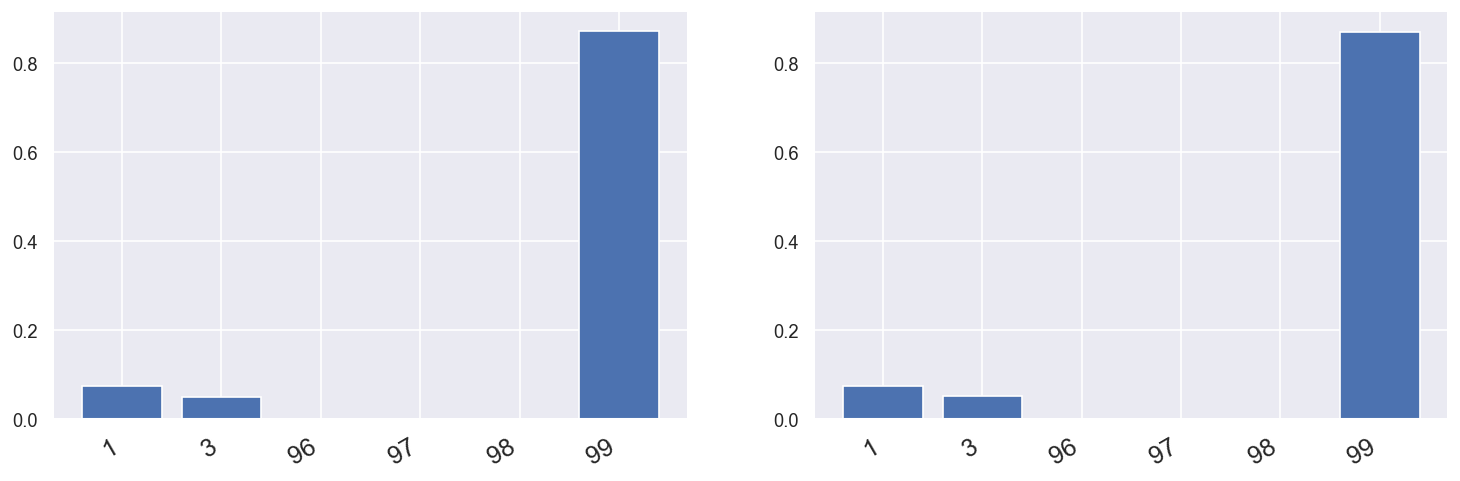

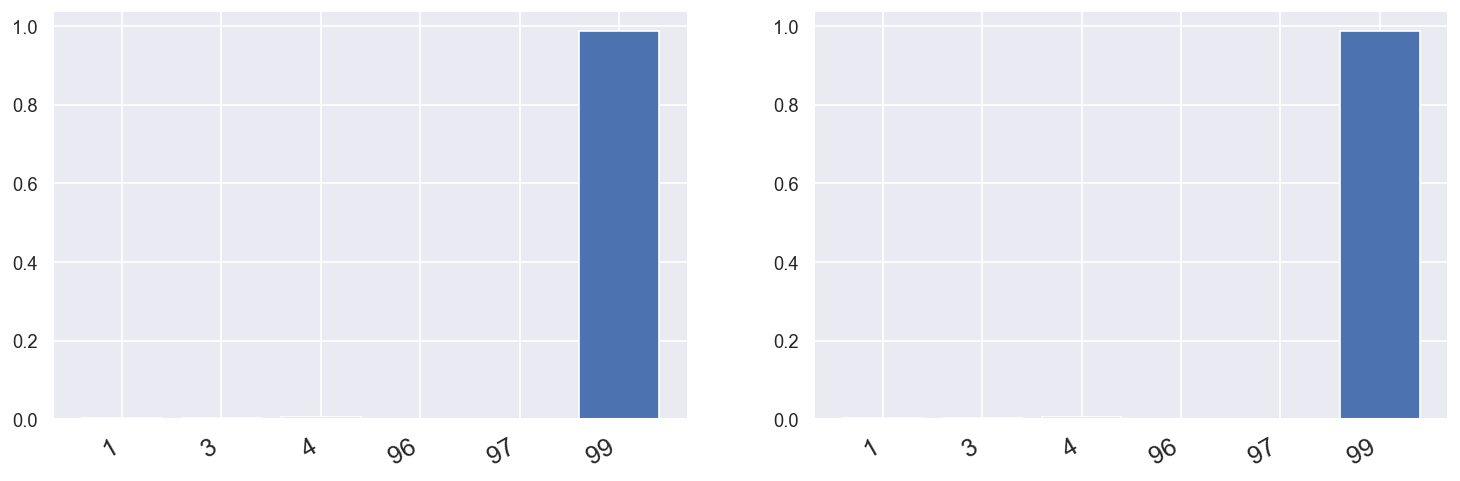

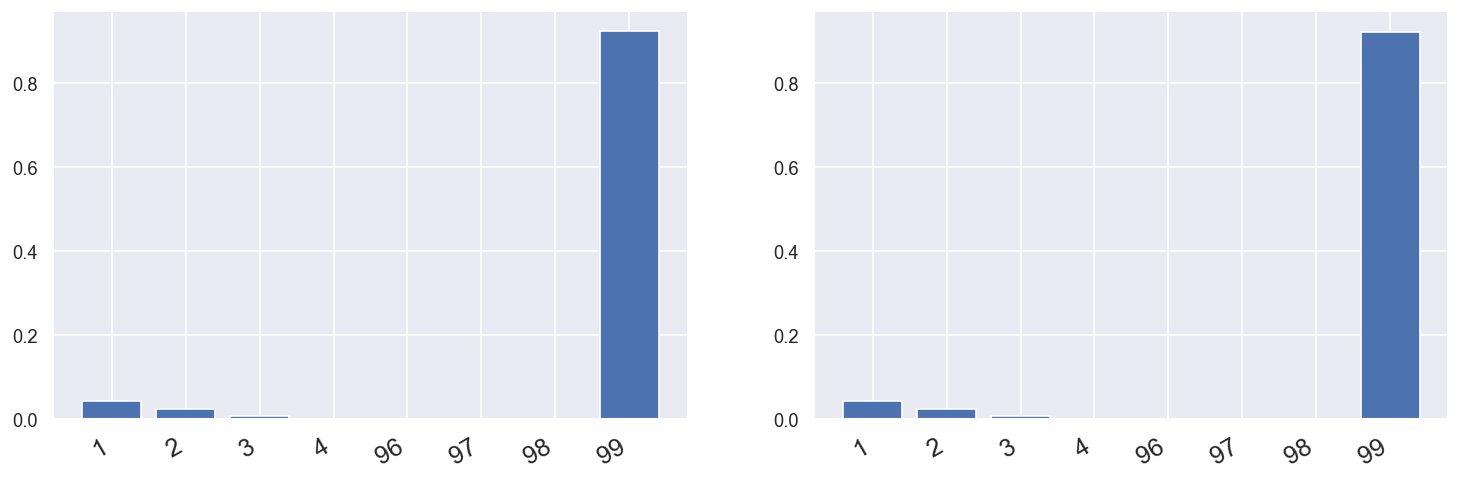

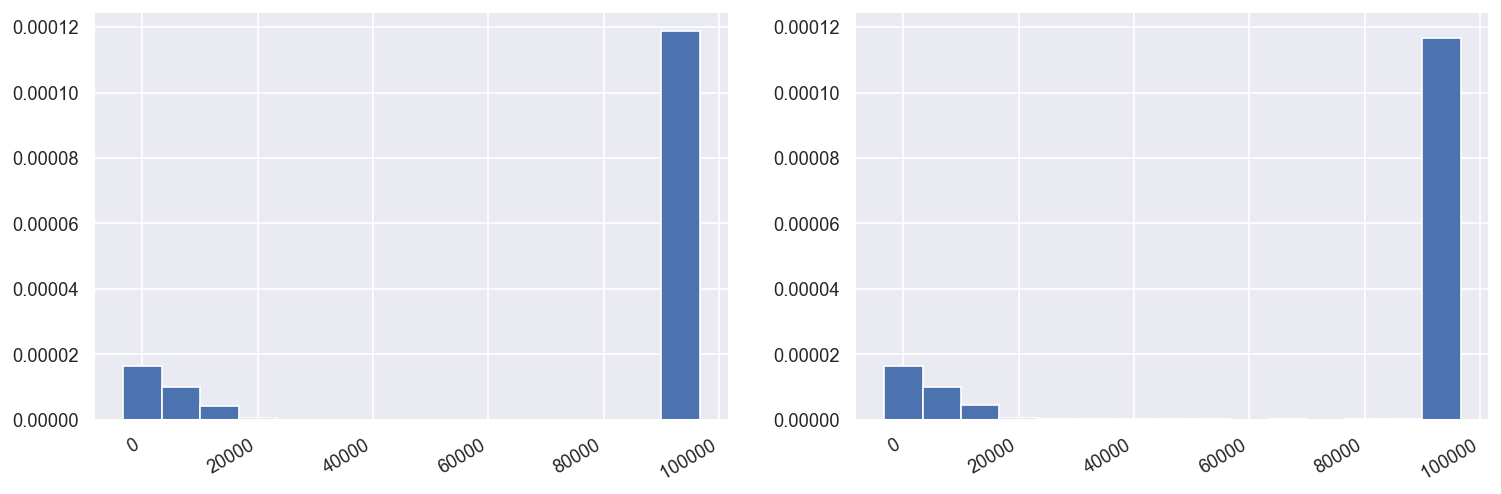

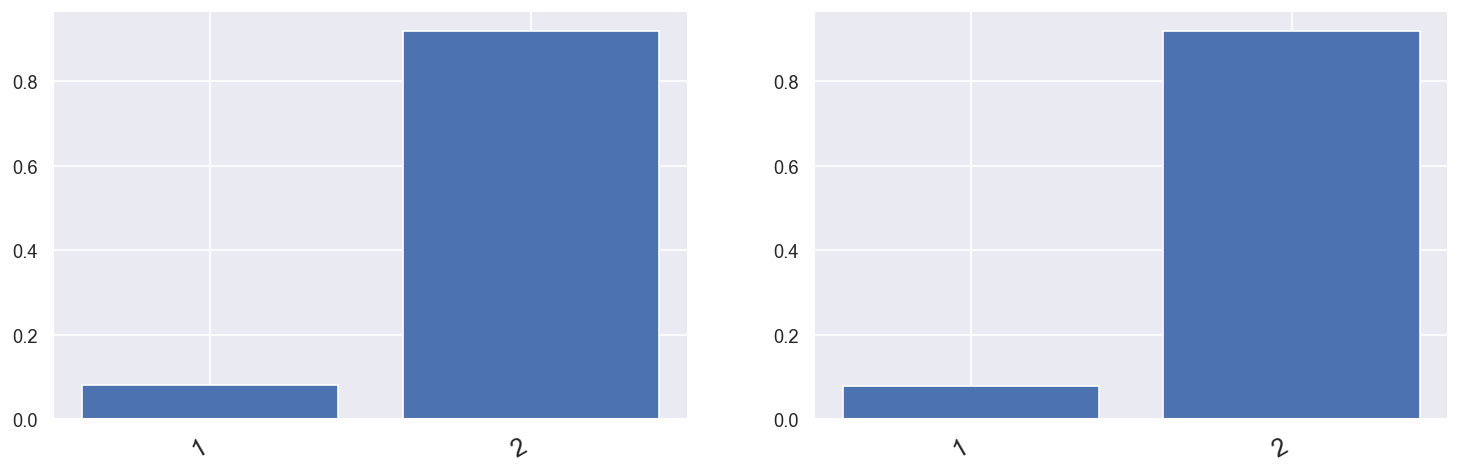

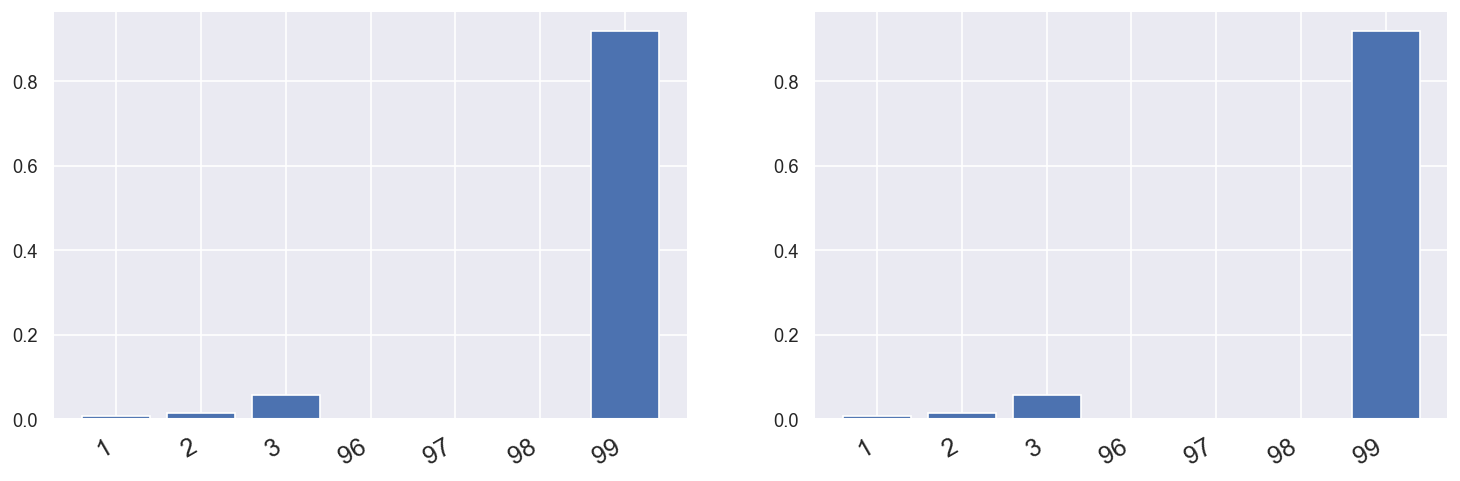

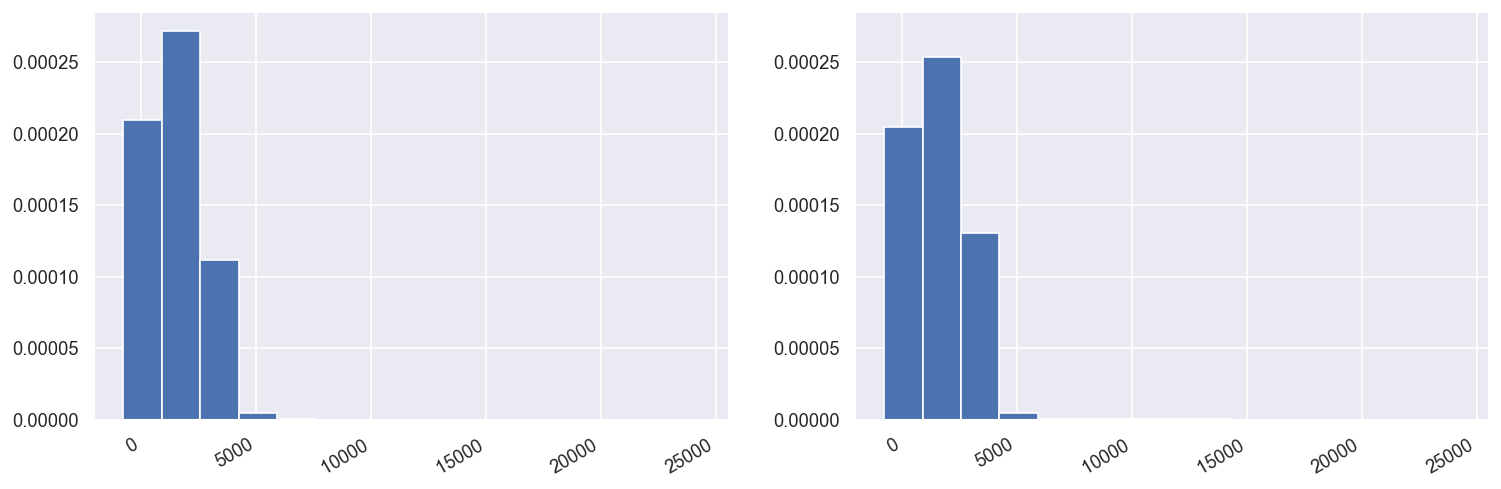

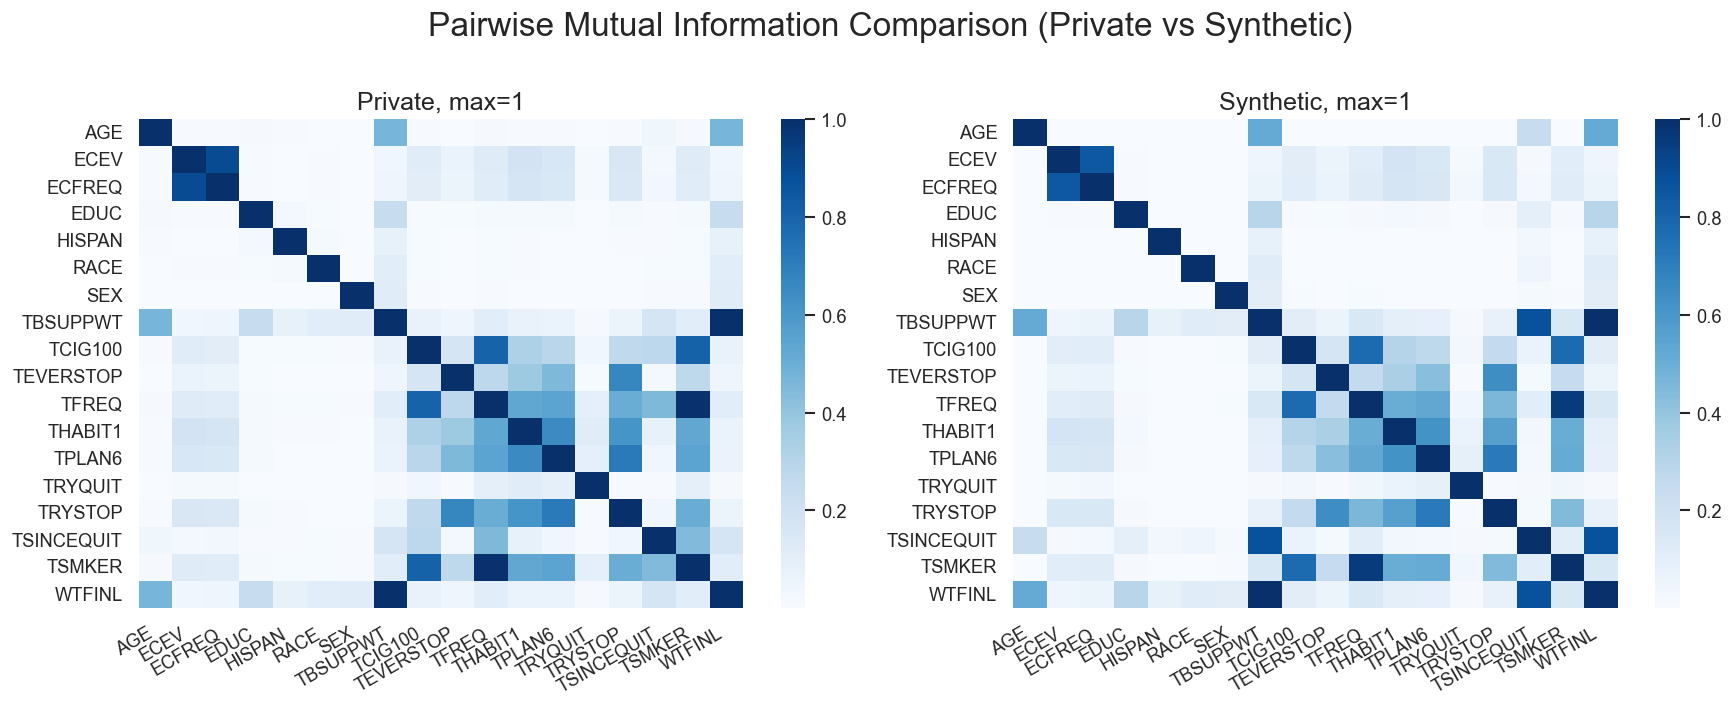

In [56]:
synth_data = runDataSynth(0, epsilon, num_tuples_to_generate, 0.3, 4
, threshold_value, null_values, description_file, synthetic_data, 0)

In [22]:
#Run Datasynth on multiple different values of epsilon and degree of Bayesian Network equal to 0(This automatically generates the Bayesian Network)
epsilon_vals = [0.05, 0.1, 0.2, 0.4, 0.8, 1.6]
describers0 = []
for epsilon in epsilon_vals:
    describer0 = runDataSynth(1, epsilon, num_tuples_to_generate, threshold_value, null_values, description_file, synthetic_data)
    describers0.append(describer)

TypeError: runDataSynth() missing 3 required positional arguments: 'description_file', 'synthetic_data', and 'seed'

In [36]:
plt.close('all')

NameError: name 'fig' is not defined

In [9]:
#Run Datasynth on multiple different values of epsilon and degree of Bayesian Network equal to 2
epsilon_vals = [0.05, 0.1, 0.2, 0.4, 0.8, 1.6]
describers2 = []
for epsilon in epsilon_vals:
    describer2 = runDataSynth(2, epsilon, num_tuples_to_generate, threshold_value, null_values, description_file, synthetic_data)
    describers2.append(describer2)
    
    


Data generated for epsilon 0.05 and degree 2


ZeroDivisionError: division by zero

In [6]:
#Run Datasynth on multiple different values of epsilon and degree of Bayesian Network equal to 3
epsilon_vals = [0.05, 0.1, 0.2, 0.4, 0.8, 1.6]
for epsilon in epsilon_vals:
    describers = []
    describer = runDataSynth(3, epsilon, num_tuples_to_generate, threshold_value, null_values, description_file, synthetic_data)
    describers.append(describer)

Data generated for epsilon 0.05 and degree 3
================ Constructing Bayesian Network (BN) ================
Adding ROOT RT13V33
Adding attribute RT13V29
Adding attribute RT13V39
Adding attribute RT13V31
Adding attribute RT13V27
Adding attribute RT13V19
Adding attribute RT13V34
Adding attribute RT13V21
Adding attribute RT13V48
Adding attribute RT13V51
Adding attribute RT13V15
Adding attribute RT13V42
Adding attribute RT13V24
Adding attribute RT13V28
Adding attribute RT13V49
Adding attribute RT13V4
Adding attribute RT13V7
Adding attribute RT13V3
Adding attribute RT13V43
Adding attribute RT13V37
Adding attribute RT13V45
Adding attribute RT13V52
Adding attribute RT13V32
Adding attribute RT13V14
Adding attribute RT13V30
Adding attribute RT13V9
Adding attribute RT13V22
Adding attribute RT13V10
Adding attribute RT13V46
Adding attribute RT13V16
Adding attribute RT13V13
Adding attribute RT13V11
Adding attribute RT13V36
Adding attribute RT13V18
Adding attribute RT13V25
Adding attribute RT1

In [ ]:
#Run Datasynth on multiple different values of epsilon and degree of Bayesian Network equal to 4(DID NOT RUN DUE TO RUNTIME)
epsilon_vals = [0.05, 0.1, 0.2, 0.4, 0.8, 1.6]
for epsilon in epsilon_vals:
    runDataSynth(4, epsilon, num_tuples_to_generate, threshold_value, null_values, description_file, synthetic_data)
